In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [44]:
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import torch
import json
import wandb

from src.utils import load_all_results

In [40]:
# results_dir = Path('../data/results/2min')
from copy import deepcopy


results_dir = Path('../data/results/')
opts_dir = Path('../data/interim/')

T = 125
TIME_BUDGET = 2 * 60

net_ids = {
    'Baseline': 'baseline',
    'Optimals': 'gbmooeqh',
    'MultiTarget': 'xae9giql',
}

hps = {
    'Baseline':{
        'obj': {
            'bs': 'bs_0',
        },
        'feas': {
            'bs': 'bs_0',
        }
    },
    'Optimals':{
        'obj': {
            'ws': 'ws_750',
            'ef': 'ef_500',
            'tr': 'tr_1000_5',
        },
        'feas': {
            'ws': 'ws_1000',
            'ef': 'ef_750',
            'tr': 'tr_1000_1',
        }
    },
    'MultiTarget':{
        'obj': {
            'ws': 'ws_1750',
            'ef': 'ef_1000',
            'tr': 'tr_1250_1',
        },
        'feas': {
            'ws': 'ws_1500',
            'ef': 'ef_1250',
            'tr': 'tr_1750_1',
        }
    }
}
fpaths = deepcopy(hps)

for m in hps.keys():
    print()
    print(m)
    print(net_ids[m])

    for p in hps[m].keys():
        print(p)
        for h, sn in hps[m][p].items():
            fpaths[m][p][h] = [fp for fp in results_dir.glob(f'{net_ids[m]}_{sn}_{T}_*.json') if int(fp.name.split('_')[-1][:-len('.json')]) >= 20]
            print(sn,':',len(fpaths[m][p][h]))

# all_shortnames = set()
# test_fpaths = [fp for fp in results_dir.glob(f'{net_id}_*_{T}_*.json') if int(fp.name.split('_')[-1][:-len('.json')]) >= 20]
# for fp in test_fpaths:
#     if 'tr' in fp.name.split('_')[1]:
#         all_shortnames.add('_'.join(fp.name.split('_')[:4]))
#     else:
#         all_shortnames.add('_'.join(fp.name.split('_')[:3]))

# # all_shortnames = {'_'.join(fp.name.split('_')[:3]) for fp in results_dir.glob(f'{net_id}_*_{T}_*.json')}
# all_shortnames.add('baseline_bs_0')
# all_shortnames
# for shortname in sorted(all_shortnames):
#     print(shortname)
#     print(len([fp for fp in results_dir.glob(shortname+f'_{T}_2*.json') if int(fp.name.split('_')[-1][:-len('.json')]) >= 20]))


Baseline
baseline
obj
bs_0 : 60
feas
bs_0 : 60

Optimals
gbmooeqh
obj
ws_750 : 0
ef_500 : 0
tr_1000_5 : 0
feas
ws_1000 : 0
ef_750 : 0
tr_1000_1 : 0

MultiTarget
xae9giql
obj
ws_1750 : 60
ef_1000 : 60
tr_1250_1 : 60
feas
ws_1500 : 60
ef_1250 : 60
tr_1750_1 : 48


In [52]:
dfs = list()
for m in fpaths.keys():
    for p in fpaths[m].keys():
        for h, fpathss in fpaths[m][p].items():
            if len(fpathss) > 0:
                # print(f"{net_ids[m]}_{hps[m][p][h]}")
                df = load_all_results(f"{net_ids[m]}_{hps[m][p][h]}", results_dir, opts_dir, test=True)
                df['model'] = m
                df['goal'] = p
                df['heuristic'] = h
                df['sn'] = hps[m][p][h]
                dfs.append(df)
df = pd.concat(dfs)
df['rel_obj'] = df['objective'] / df['opt_obj']
df

,size,size_id,opt_obj,infeasible,runtime,objective,gap,primal_curve,time_to_feasible,model,goal,heuristic,sn,rel_obj
0,20,21,13534,False,120.000399,9049.0,0.525226,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",62.091,Baseline,obj,bs,bs_0,0.668612
1,24,34,11353,False,120.005067,9844.0,0.405220,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.312,Baseline,obj,bs,bs_0,0.867084
2,24,22,17038,False,120.003566,17038.0,0.000195,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",45.439,Baseline,obj,bs,bs_0,1.0
3,20,30,18138,False,120.001999,16884.0,0.206302,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",56.067,Baseline,obj,bs,bs_0,0.930863
4,22,38,11326,True,120.002011,0.0,-1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.000,Baseline,obj,bs,bs_0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,24,25,7626,True,120.000495,0.0,-1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.000,MultiTarget,feas,tr,tr_1750_1,0.0
44,24,20,13780,False,120.000503,13485.0,0.136021,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",55.660,MultiTarget,feas,tr,tr_1750_1,0.978592
45,22,21,8968,False,120.004362,8873.0,0.037684,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",52.927,MultiTarget,feas,tr,tr_1750_1,0.989407
46,24,24,14779,True,1.635774,0.0,-1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",120.000,MultiTarget,feas,tr,tr_1750_1,0.0


In [53]:
gb = df.groupby(['model', 'goal', 'heuristic'])
print('Infeasibility')
gb['infeasible'].sum() / gb['sn'].count()

Infeasibility


model        goal  heuristic
Baseline     feas  bs           0.333333
             obj   bs           0.333333
MultiTarget  feas  ef           0.183333
                   tr           0.354167
                   ws           0.283333
             obj   ef           0.183333
                   tr           0.166667
                   ws           0.350000
dtype: float64

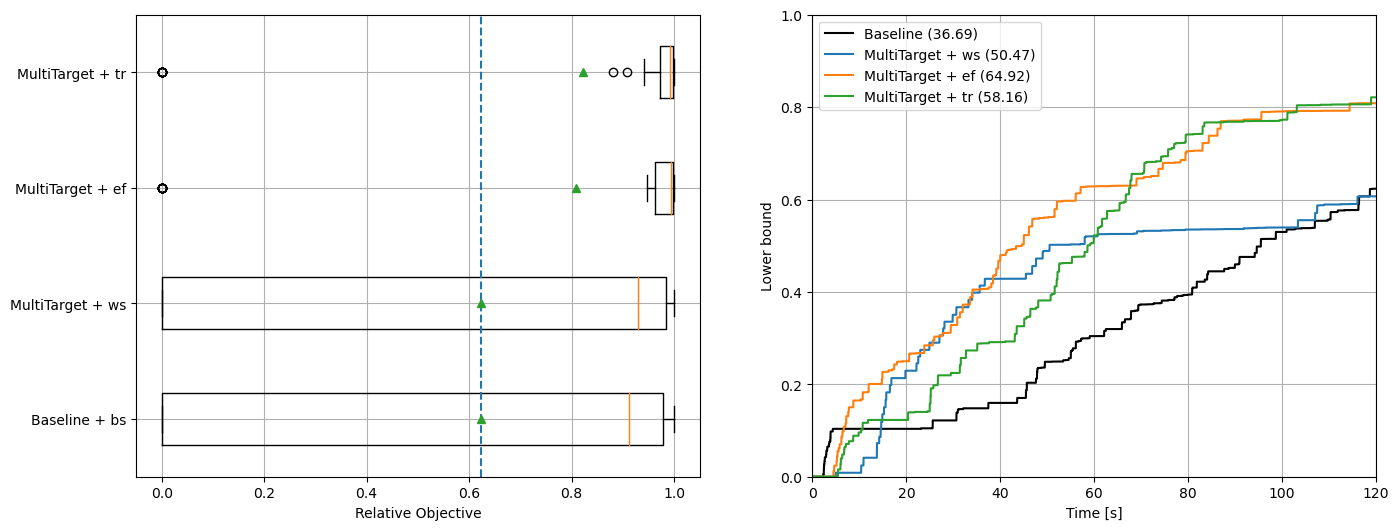

In [84]:
df_ = df[df['goal'] == 'obj']

fig, axs = plt.subplots(1,2)
fig.set_size_inches(16,6)

labels = list()
rel_objs = list()
for m, h in df_[['model', 'heuristic']].drop_duplicates().values:
    label = f"{m} + {h}"
    labels.append(label)
    rel_objs.append(
        df_[(df_['model'] == m) & (df_['heuristic'] == h)]['rel_obj'].values
    )

    curve = df_[(df_['model'] == m) & (df_['heuristic'] == h)]['primal_curve'].mean()
    dt = TIME_BUDGET / (len(curve)-1)
    auc = np.sum(curve * dt)
    x = np.arange(len(curve)) * dt

    if m == 'Baseline':
        axs[1].plot(x, curve, color='black', label=f"Baseline ({auc:.2f})")
    else:
        axs[1].plot(x, curve, label=f"{label} ({auc:.2f})")
axs[1].set_ylabel('Lower bound')
axs[1].set_xlabel('Time [s]')
axs[1].set_xlim(0,TIME_BUDGET)
axs[1].set_ylim(0,1)
axs[1].grid()
axs[1].legend()

axs[0].boxplot(rel_objs, labels=labels, vert=False, showmeans=True)

axs[0].vlines(df_[(df_['model'] == 'Baseline')]['rel_obj'].mean(), linestyles='--', *axs[0].get_ylim())
axs[0].set_xlabel('Relative Objective')
axs[0].grid()

fig.show()

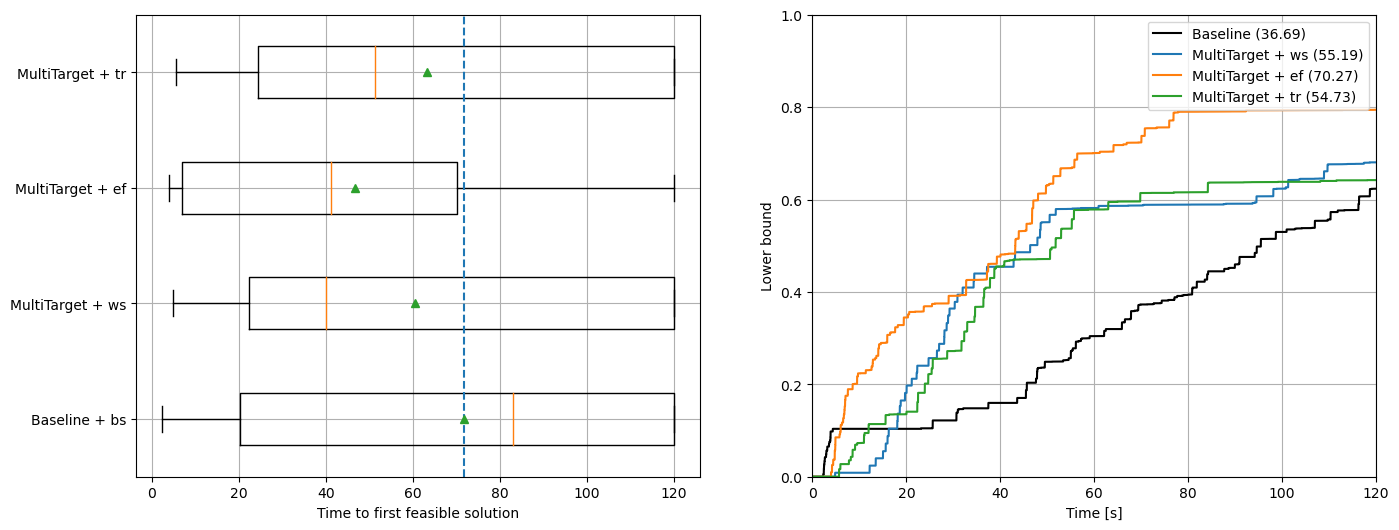

In [85]:
df_ = df[df['goal'] == 'feas']

fig, axs = plt.subplots(1,2)
fig.set_size_inches(16,6)

labels = list()
ttfs = list()
for m, h in df_[['model', 'heuristic']].drop_duplicates().values:
    label = f"{m} + {h}"
    labels.append(label)
    ttfs.append(
        df_[(df_['model'] == m) & (df_['heuristic'] == h)]['time_to_feasible'].values
    )

    curve = df_[(df_['model'] == m) & (df_['heuristic'] == h)]['primal_curve'].mean()
    dt = TIME_BUDGET / (len(curve)-1)
    auc = np.sum(curve * dt)
    x = np.arange(len(curve)) * dt

    if m == 'Baseline':
        axs[1].plot(x, curve, color='black', label=f"Baseline ({auc:.2f})")
    else:
        axs[1].plot(x, curve, label=f"{label} ({auc:.2f})")
axs[1].set_ylabel('Lower bound')
axs[1].set_xlabel('Time [s]')
axs[1].set_xlim(0,TIME_BUDGET)
axs[1].set_ylim(0,1)
axs[1].grid()
axs[1].legend()

axs[0].boxplot(ttfs, labels=labels, vert=False, showmeans=True)

axs[0].vlines(df_[(df_['model'] == 'Baseline')]['time_to_feasible'].mean(), linestyles='--', *axs[0].get_ylim())
axs[0].set_xlabel('Time to first feasible solution')
axs[0].grid()

fig.show()

In [86]:
# TODO

# sizes = sorted(dfs['baseline_bs_0']['size'].unique())

# fig, axss = plt.subplots(len(sizes),3)

# fig.set_size_inches(16,len(sizes) * 6)

# for i, s in enumerate(sizes):
#     axs = axss[i]

#     axs[0].set_title('early fixing')
#     axs[1].set_title('warm starting')
#     axs[2].set_title('trust region')

#     for sn, df_ in dfs.items():
#         df = df_[df_['size'] == s]

#         dt = 1e-3
#         curve = df['primal_curve'].mean()
#         auc = np.sum(curve * dt)
#         x = np.arange(len(curve)) * dt

#         if 'ef' in sn:
#             ax = axs[0]
#         elif 'ws' in sn:
#             ax = axs[1]
#         elif 'tr' in sn:
#             ax = axs[2]
#         else:
#             for ax in axs:
#                 ax.plot(x, curve, color='black', label=f"baseline ({auc:.2f})")
#             continue
#         # ax.plot(x, curve, label=sn+f" ({auc:.2f})")
#         ax.plot(x, curve, label=sn.split('_')[0]+' '+sn.split('_')[2]+f" ({auc:.2f})")
#         ax.set_ylabel('lower bound')
#         ax.set_xlabel('time')
#     # plt.plot(df[~df['infeasible']]['primal_curve'].mean())

#     for ax in axs:
#         ax.set_xlim(0,120)
#         ax.set_ylim(0,1)
#         ax.legend()
#         ax.grid()

#     axs[0].set_ylabel(f'# of jobs = {s}')
# plt.show()